<h1 style='font-size:40px'> Integrals</h1>

<div> 
    <ul style='font-size:20px'> 
        <li> 
            Extraímos integrais de uma função quando desejamos saber a área sob a sua curva dentro de um intervalo. A intuição seria traçarmos vários retângulos na região e somarmos as suas áreas.
        </li>
    </ul>
</div>

<BarContainer object of 10 artists>

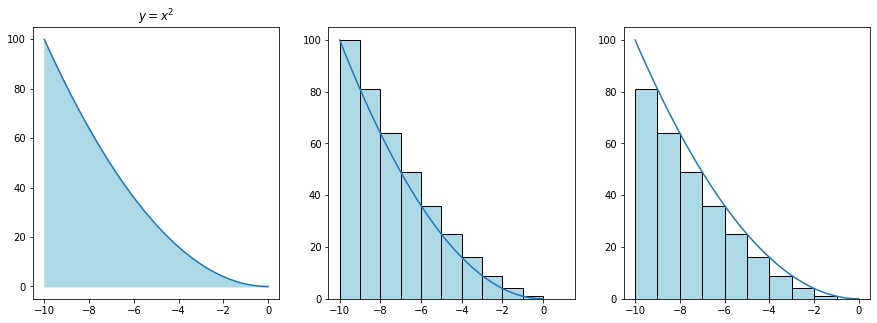

In [71]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 0, 101)
y = x**2

# Área x^2.
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(x,y)
plt.title('$y=x^{2}$')
plt.fill_between(x,y, color='lightblue')

# Ŕetângulos sob a curva.
x_bar = np.linspace(-10, 0, 11)
y_bar = x_bar**2
plt.subplot(132)
plt.plot(x,y)
plt.bar(x_bar,y_bar, width=1, color='lightblue', edgecolor='k', align='edge')

# Segundo tipo de aproximação (curva tangenciando vértice superior direito).
x_bar2 = np.linspace(-9, 0, 10)
y_bar2 = x_bar2**2
plt.subplot(133)
plt.plot(x,y)
plt.bar(x_bar2,y_bar2, width=-1, color='lightblue', edgecolor='k', align='edge')

<div> 
    <ul style='font-size:20px'> 
        <li> 
            Note que os retângulos podem ter a sua altura definida a partir do valor da abscissa esquerda ou direita. Com isso, obtemos duas aproximações ($L_{n}; R_{n}$) em que n é a quantidade de retângulos.
        </li>
        <li> 
            Conforme aumentamos o número de barras, $L_{n}$ e $R_{n}$ se aproximam a um valor comum, que seria a área verdadeira da seção.
            $$
                L_{n}<A<R_{n}
            $$
        </li>
    </ul>
</div>

In [78]:
# Medindo a área aproximada sob a curva em [-10, 0].

# Podemos concluir que R_10>A>L_10.
np.dot(np.diff(x_bar), y_bar[:-1]), np.dot(np.diff(x_bar2), y_bar2[:-1])

(385.0, 285.0)

<div> 
    <ul style='font-size:20px'> 
        <li> 
            Ao dividirmos a área sob a curva em n retângulos dentro do intervalo [a,b], a largura de cada um deles será tida como $\Delta{x}=\frac{b-a}{n}$.
        </li>
        <li> 
            A fórmula da aproximação pelo vértice esquerdo pode ser dada como $L=\lim_{n \to \infty}{\sum_{i=1}^{n}f(x_{i-1})\Delta{x}}$
        </li>
        <li> 
            Já a do pelo direito: $R=\lim_{n \to \infty}{\sum_{i=1}^{n}f(x_{i})\Delta{x}}$
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> Sample Points</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            É ainda possível utilizar um ponto intermediário entre $x_{i-1}$ e $x_{i}$ como abscissa a definir a altura da barra. O livro o chama de sample point, sendo esse denotado como $x_{i}^{*}$. 
            $$
                S=\lim_{n \to \infty}\sum_{i=1}^{n}f(x_{i}^{*})\Delta{x}
            $$
        </li>
    </ul>
</div>

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> Example III</h4>

In [110]:
print(f'b (4 Intervalos): {sum([.5*np.exp( -(1/4 + (i-1)/2) ) for i in range(1,5)])}')
print(f'b (10 Intervalos): {sum([.2*np.exp( -(1/10 + (i-1)/5) ) for i in range(1,11)])}')

b (4 Intervalos): 0.8557230380615274
b (10 Intervalos): 0.8632252884236424


<h2 style='font-size:30px'> The Distance Problem</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            O cálculo da distância percorrida por um objeto dada a sua velocidade é um problema clássico de medidas de áreas sub curvas.
        </li>
        <li> 
            Para esse fim, designamos a cada intervalo de tempo uma velocidade que será usada como altura do retângulo. O ideial seria fazermos inúmeras medições da velocidade durante o tempo para nos permitir gerar um número maior de barras.
        </li>
    </ul>
</div>

Text(0.5, 1.0, 'Velocidade x Tempo')

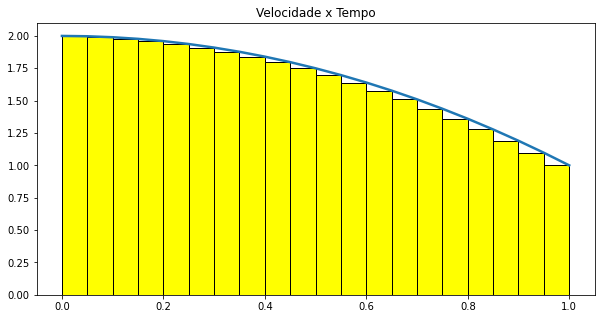

In [262]:
# Uma pequena função velocidade em função do tempo v(t)=-t**2 + 2
t = np.linspace(0, 1, 21) 
v = -t** 2 + 2

# Expressando a função como gráfico de linha e barras.
plt.figure(figsize=(10,5))
plt.plot(t, v, lw=2.5)
plt.bar(t[1:], v[1:], width=-.05,align='edge', color='yellow',edgecolor='k')
plt.title('Velocidade x Tempo')

<h3 style='font-size:30px;font-style:italic'> 5.1 Integrals</h3>

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> 5</h4>

In [282]:
def ex5(x:float):
    return 1 + x**2

def integral(func:'function', interval:list, n:int, height_type:str):
    assert height_type in ('left', 'right', 'midpoint')
    # Delta x da função
    delta = abs(interval[1] - interval[0]) / n
    # Lógica caso usarmos o left-endpoint.
    if height_type == 'left':
        # Abscissas onde medir a função (altura das barras).
        x = np.linspace(interval[0], interval[1], n+1)[:-1]
        print(x)
        # Altura das barras.
        height = np.array([func(i) for i in x])
        return sum(delta *  height)
    
    # Lógica caso usarmos o right-endpoint.
    elif height_type == 'right':
        # Abscissas onde medir a função (altura das barras).
        x = np.linspace(interval[0]+delta, interval[1]+delta, n+1)[:-1]
        print(x)
        # Altura das barras.s
        height = np.array([func(i) for i in x])
        return sum(delta * height)
    
    # Lógica usando midpoints.
    else:
        x = np.linspace(interval[0], interval[1], n+1)
        x = [np.mean([x[i-1], x[i]]) for i in range(1, len(x))]
        print(x)
        height = np.array([func(i) for i in x])
        return sum(delta * height)
        
integral(ex5, [-1, 2], 6, 'midpoint')

[-0.75, -0.25, 0.25, 0.75, 1.25, 1.75]


5.9375

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> 11</h4>

In [302]:
t = np.linspace(0, 3, 7)
v = [0, 6.2, 10.8, 14.9, 18.1, 19.4, 20.2]

# Medindo AUC pelo vértice esquerdo dos retângulos.
L = np.dot(np.diff(t), v[:-1])
print(f'L: {L :.2f}')

# Agora, pelos direitos.
R = np.dot(np.diff(t), v[1:])

print(f'R: {R :.2f}')

L: 34.70
R: 44.80


<p style='color:red'> 5.2 The Definite Integral</p>